In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('data/SP500/symbols/GOOG.csv')
training_set = dataset_train.iloc[:,5:6].values
dataset_train.shape

(1239, 7)

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
training_set.shape

(1239, 1)

In [5]:
# Creating a data structure with 20 timesteps and t+1 output
X_train = []
y_train = []
for i in range(20, 1239):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 3, input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

Using TensorFlow backend.


In [7]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1219/1219 [==============================] - 0s - loss: 0.1328     
Epoch 2/100
1219/1219 [==============================] - 0s - loss: 0.0522     
Epoch 3/100
1219/1219 [==============================] - 0s - loss: 0.0276     
Epoch 4/100
1219/1219 [==============================] - 0s - loss: 0.0150     
Epoch 5/100
1219/1219 [==============================] - 0s - loss: 0.0063     
Epoch 6/100
1219/1219 [==============================] - 0s - loss: 0.0023     
Epoch 7/100
1219/1219 [==============================] - 0s - loss: 0.0013     
Epoch 8/100
1219/1219 [==============================] - 0s - loss: 7.6542e-04     
Epoch 9/100
1219/1219 [==============================] - 0s - loss: 5.2761e-04     
Epoch 10/100
1219/1219 [==============================] - 0s - loss: 4.1770e-04     
Epoch 11/100
1219/1219 [==============================] - 0s - loss: 3.8065e-04     
Epoch 12/100
1219/1219 [==============================] - 0s - loss: 3.5800e-04     
Epoch 13/100
1219

In [8]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price 
dataset_test = pd.read_csv('data/SP500/symbols/GOOG_test.csv')
test_set = dataset_test.iloc[:,5:6].values
real_stock_price = np.concatenate((training_set[0:1239], test_set), axis = 0)

In [9]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,1204.270020,1212.989990,1192.500000,1197.000000,1197.000000,1831000
1,2018-09-05,1193.800049,1199.010010,1162.000000,1186.479980,1186.479980,2061300
2,2018-09-06,1186.300049,1186.300049,1152.000000,1171.439941,1171.439941,1888500
3,2018-09-07,1158.670044,1175.260010,1157.214966,1164.829956,1164.829956,1401300
4,2018-09-10,1172.189941,1174.540039,1160.109985,1164.640015,1164.640015,1115400
5,2018-09-11,1161.630005,1178.680054,1156.239990,1177.359985,1177.359985,1209300
6,2018-09-12,1172.719971,1178.609985,1158.359985,1162.819946,1162.819946,1295500
7,2018-09-13,1170.739990,1178.609985,1162.849976,1175.329956,1175.329956,1431200
8,2018-09-14,1179.099976,1180.425049,1168.329956,1172.530029,1172.530029,944000
9,2018-09-17,1170.140015,1177.239990,1154.030029,1156.050049,1156.050049,1306500


In [10]:
# Getting the predicted stock price of 2017
scaled_real_stock_price = sc.fit_transform(real_stock_price)
inputs = []
for i in range(1239, 1258):
    inputs.append(scaled_real_stock_price[i-20:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [11]:
predicted_stock_price

array([[1226.6484],
       [1203.5823],
       [1191.0706],
       [1177.0203],
       [1167.3806],
       [1162.626 ],
       [1166.9612],
       [1159.4315],
       [1164.3264],
       [1163.7792],
       [1154.7183],
       [1154.9248],
       [1159.8082],
       [1169.9457],
       [1161.8232],
       [1164.3927],
       [1171.1178],
       [1170.9331],
       [1179.3606]], dtype=float32)

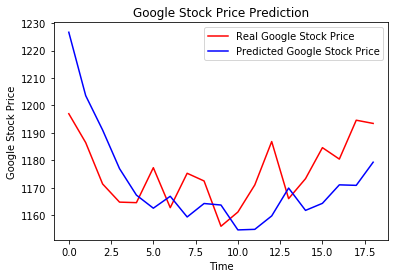

In [14]:
# Visualising the results
plt.plot(real_stock_price[1239:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [15]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [16]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(test_set, predicted_stock_price)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(test_set, predicted_stock_price))))

Score
MAE:  13.9261
RMSE: 15.8454  


In [17]:
print('MSE:  %.4f' % (mean_squared_error(test_set, predicted_stock_price)))

MSE:  251.0758
